In [1]:
import zipfile
with zipfile.ZipFile("CovidDataset.zip","r") as zip_ref:
    zip_ref.extractall("D:\MINI PROJECT")

In [2]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [4]:
# CNN Based Model in Keras
n_classes = 2

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [6]:
#Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1.255,)

In [7]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)



Found 224 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 60 images belonging to 2 classes.


In [10]:
hist = model.fit(
    train_generator,
    steps_per_epoch=6,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
6/6 [==============================] - 71s 11s/step - loss: 1.1054 - accuracy: 0.5521 - val_loss: 8.0104 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 44s 7s/step - loss: 0.6070 - accuracy: 0.7135 - val_loss: 3.2650 - val_accuracy: 0.9167
Epoch 3/10
6/6 [==============================] - 36s 6s/step - loss: 0.4898 - accuracy: 0.7812 - val_loss: 11.6543 - val_accuracy: 0.9333
Epoch 4/10
6/6 [==============================] - 31s 5s/step - loss: 0.4098 - accuracy: 0.7812 - val_loss: 37.4447 - val_accuracy: 0.8500
Epoch 5/10
6/6 [==============================] - 30s 5s/step - loss: 0.2842 - accuracy: 0.8802 - val_loss: 9.8549 - val_accuracy: 0.9500
Epoch 6/10
6/6 [==============================] - 31s 5s/step - loss: 0.2795 - accuracy: 0.9271 - val_loss: 14.7697 - val_accuracy: 0.9500
Epoch 7/10
6/6 [==============================] - 32s 5s/step - loss: 0.1928 - accuracy: 0.9375 - val_loss: 56.0751 - val_accuracy: 0.8667
Epoch 8/10
6/6 [=============

In [11]:
model.save('model_adv.h5')

In [12]:
model.evaluate_generator(train_generator)

C:\Users\sunee\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.09587278217077255, 0.9732142686843872]

In [13]:
model.evaluate_generator(validation_generator)

C:\Users\sunee\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[6.486047267913818, 0.9666666388511658]

In [14]:
#TEST IMAGES
model = load_model('model_adv.h5')

In [15]:
import os

In [16]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [17]:
y_actual = []
y_test = []

In [18]:
path = "CovidDataset/Val/Covid/353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg"
img = image.load_img(path=path, target_size=(224,224))
img = image.img_to_array(img)/255
img = np.expand_dims(img, axis = 0)
x = model.predict(img)
p = (np.argmax(x,axis = 1))
print(p)


[0]


In [19]:
for i in os.listdir("./CovidDataset/Val/Normal"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img, axis = 0)
  x = model.predict(img)
  p = (np.argmax(x,axis=1))
  y_test.append(p[0])
  y_actual.append(1)

In [20]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img, axis = 0)
  y = model.predict(img)
  y_test.append(np.argmax(y,axis=1)[0])
  y_actual.append(0)

In [21]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [22]:
y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(y_actual, y_test) 

In [26]:
import seaborn as sns

<AxesSubplot:>

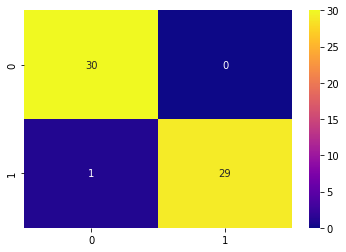

In [27]:
sns.heatmap(cm, cmap="plasma", annot=True)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_actual,y_test)

0.9833333333333333